# Study Welch meth.

### Setup

In [52]:
from scipy import signal
import os
import spikeinterface as si
import numpy as np
from matplotlib import pyplot as plt
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

# move to PROJECT PATH
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/preprint_2023/"
os.chdir(PROJ_PATH)

from src.nodes.utils import get_config

# config
data_conf_vivo, _ = get_config("vivo_marques", "c26").values()
RAW_PATH_vivo = data_conf_vivo["probe_wiring"]["output"]

# silico
data_conf_sili, _ = get_config("silico_neuropixels", "concatenated").values()
RAW_PATH_sili = data_conf_sili["probe_wiring"]["output"]

# parameters
DURATION = 10 * 60  # 10 min

L5_SITE = 259  # site in layer 5

SFREQ_vivo = 30000  # sampling frequency
SFREQ_sili = 40000  # sampling frequency

# Welch PSD
FILT_WINDOW = "hann"
FILT_WIND_SIZE_vivo = 30000  # 5125*6   #2300  # tuned to get a freq. resol. of 0.1 Hz
FILT_WIND_OVERLAP_vivo = int(FILT_WIND_SIZE_vivo // 1.5)
FILT_WIND_SIZE_sili = 40000  # 5125*6   #2300  # tuned to get a freq. resol. of 0.1 Hz
FILT_WIND_OVERLAP_sili = int(FILT_WIND_SIZE_sili // 1.5)

2024-05-14 14:40:45,090 - root - utils.py - get_config - INFO - Reading experiment config.
2024-05-14 14:40:45,114 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-05-14 14:40:45,116 - root - utils.py - get_config - INFO - Reading experiment config.
2024-05-14 14:40:45,158 - root - utils.py - get_config - INFO - Reading experiment config. - done


### Load dataset

In [53]:
# load raw traces
RawVivo = si.load_extractor(RAW_PATH_vivo)
trace_vivo = RawVivo.get_traces(channel_ids=[L5_SITE], end_frame=SFREQ_vivo * DURATION)
trace_vivo = np.array(trace_vivo).flatten()

# load raw traces
RawSili = si.load_extractor(RAW_PATH_sili)
trace_sili = RawSili.get_traces(channel_ids=[L5_SITE], end_frame=SFREQ_sili * DURATION)
trace_sili = np.array(trace_sili).flatten()

### Plot

Welch freq. resolution: 1.0
Welch freq. resolution: 1.0
The upper bound freq. resolution (Fourier's): 0.0016666666666666668


(0.0, 0.15)

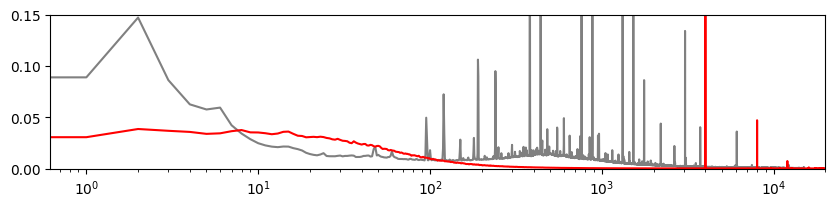

In [54]:
# plot
# VIVO ********************************
# resolution
freqs, powers = signal.welch(
    trace_vivo,
    SFREQ_vivo,
    window=FILT_WINDOW,
    nperseg=FILT_WIND_SIZE_vivo,
    noverlap=FILT_WIND_OVERLAP_vivo,
)
print("Welch freq. resolution:", np.sort(freqs)[1] - np.sort(freqs)[0])

# plot
fig, ax = plt.subplots(1, 1, figsize=(10, 2))
ax.plot(
    freqs,
    powers,
    color="gray",
    label="vivo",
)
ax.set_xscale("log")
ax.set_xlim([-1, SFREQ_vivo / 2])

# SILICO ********************************
# resolution
freqs, powers = signal.welch(
    trace_sili,
    SFREQ_sili,
    window=FILT_WINDOW,
    nperseg=FILT_WIND_SIZE_sili,
    noverlap=FILT_WIND_OVERLAP_sili,
)
print("Welch freq. resolution:", np.sort(freqs)[1] - np.sort(freqs)[0])
print("The upper bound freq. resolution (Fourier's):", SFREQ_sili / trace_sili.shape[0])

# plot
ax.plot(
    freqs,
    powers,
    color="r",
    label="sili",
)
ax.set_xscale("log")
ax.set_xlim([-1, SFREQ_sili / 2])
ax.set_ylim([0, 0.15])